In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import integrate

# Problem 1A

In [2]:
# Define black hole masses (in grams)
EBH_mass_arr = [2.5*1e11, 4*1e11, 9*1e11]

# Define function that converts the mass of black hole to temperature (in GeV)
def EBH_temperature(mass):
    return (1.057 * 1e13) / mass

# Define function that finds the probability of one neutrino energy (unnormalised)
def P_energy(energy, temp):
    e_stuff = np.exp(energy/temp)
    P = ( ( e_stuff-1 )/( e_stuff+3 ) ) * 1/( e_stuff+1 )
    return P

# Define a function that returns the UNNORMALISED PDF for neutrinos
def PDF_unnorm(energies, mass):
    """
    energies = the x-values, is an array of different neutrino energies of which we want the probability
    mass = mass of black hole
    """
    
    # First we get the temperature of the black hole
    temp = EBH_temperature(mass)
    
    # Calc the unnormalised PDF
    return [ P_energy(energy,temp) for energy in energies ]

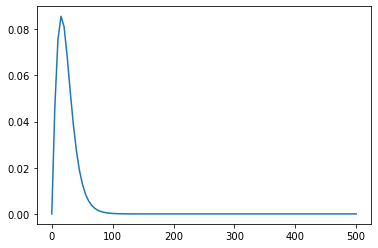

In [3]:
# Define energies to look at
energies_arr = np.linspace(0,500,100)

# Calc P
p_energies_arr = PDF_unnorm(energies_arr, EBH_mass_arr[2])

# Plotting
plt.plot(energies_arr, p_energies_arr)
plt.show()

<font color='red'>0.368 (9*10**11) masse, upper limit 350 (Linea)</font>

In [4]:
def PDF_numerical(energies, mass, up_lim):
    
    # First we get the temperature of the black hole
    temp = EBH_temperature(mass)
    
    # Define func to integrate
    function = lambda E: ( ( np.exp(E/temp)-1 )/( np.exp(E/temp)+3 ) ) * (1/( np.exp(E/temp)+1 ))
    
    # Integrate
    area, area_err = integrate.quad(function, 0, up_lim)
    print(area,area_err)
    
    # Find norm constant
    k = 1 / area
    print('constant is:',k)
    
    # Return normalised func, evaluated at energies
    function(energies)
    
    return [ P_energy(energy,temp)*k for energy in energies ]

2.713542851303193 6.68370777121138e-09
constant is: 0.36852191205299917


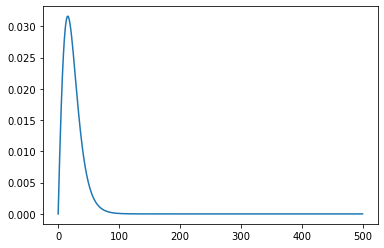

In [5]:
# Define energies to look at
energies_arr = np.linspace(0,500,1000)

# Calc P
p_energies_arr = PDF_numerical(energies_arr, EBH_mass_arr[2], 500)

# Plotting
plt.plot(energies_arr, p_energies_arr)
plt.show()

In [6]:
# Analytically
E,T = sp.symbols('E,T')
func_string = '( ( exp(E/T)-1 )/( exp(E/T)+3 ) ) * ( 1/( exp(E/T)+1 ) )'
int_expr = sp.integrate(func_string, (E,0,500))

In [7]:
int_expr.subs('T', EBH_temperature(EBH_mass_arr[0])).evalf()

3.95129460524868

In [8]:
1 / int_expr.subs('T', EBH_temperature(EBH_mass_arr[0])).evalf()

0.253081609928973

Okay there is a relative big difference between nummerical integration and analytical integration. Only for a certain limit does it reach the same. Sympy is also maybe wrong when analysing it visually and estimating the area if we say we cut it at 100 and say it is a trianlge.

# Problem 1B

# Problem 1C

# Problem 1D